In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = []
with open("Cauchy.csv", "r") as file:
    for line in file:
        data.append(float(line.strip()))

In [3]:
# Логарифмическая функция правдободобия L(x0)
def L(x0, values = data):
    return sum([
        np.log(1 / (np.pi * (1 + (x - x0) ** 2))) for x in values
    ])

Если взглянуть на плотность нашего распределения: $p(x)=\frac{1}{\pi(1+(x−x_0)^2)}$, можно понять, что она максимальна в точке $x_0$ и симметрично убывает при отдалении от этого значения. Это значит, что наш оцениваемый параметр должен находится среди значений данных. Поэтому в качестве диапазона для его поиска возмем $[\min{x},\max{x}]$

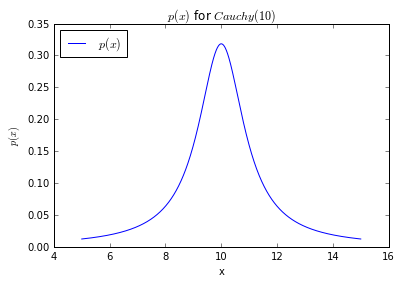

In [4]:
x0 = 10
def p(x):
    return 1 / (np.pi * (1 + ((x - x0) ** 2)))
xp = np.linspace(x0 - 5, x0 + 5, 10**3)

myFigure, myAxis = plt.subplots()
myAxis.plot(xp, [p(x) for x in xp], label=r"$p(x)$")
myAxis.legend(loc="upper left")
myAxis.set_xlabel("x")
myAxis.set_ylabel(r"$p(x)$")
myAxis.set_title(r"$p(x)$ for $Cauchy({})$".format(x0))

In [5]:
xStep = 0.01

In [9]:
# Половина всей выборки

xMin, xMax = min(data[:int(len(data) / 2)]), max(data[:int(len(data) / 2)])
maximum = L(xMin, data[:int(len(data) / 2)])
result1 = xMin
for x in np.arange(start=xMin, stop=xMax, step=xStep):
    temp = L(x, data[:int(len(data) / 2)])
    if temp > maximum:
        maximum = temp
        result1 = x
print(result1)

685.99


При оценке по половине выборки получаем $x_0=685.99$

In [10]:
# Целая выборка

xMin, xMax = min(data), max(data)
maximum = L(xMin)
result2 = xMin
for x in np.arange(start=xMin, stop=xMax, step=xStep):
    temp = L(x)
    if temp > maximum:
        maximum = temp
        result2 = x
print(result2)

685.969999999


А при оценке по полной выборке получаем $x_0=685.97$

Посчитав логарифмическую функцию правдоподобия на обоих значениях по полной выборке, получим, что значение по полной выборке более правдоподобное. Никаких противоречий здесь не возникает, это логично.